In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('titanic.csv', index_col = 'PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### 1. На корабле находились 577 мужчин и 314 женщин

In [4]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

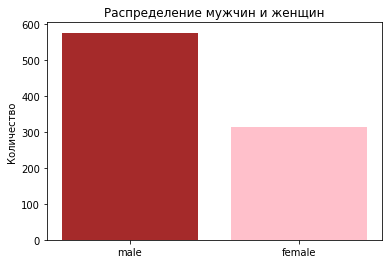

In [5]:
plt.bar(data['Sex'].value_counts().index, data['Sex'].value_counts(), color = ['brown', 'pink'])
plt.title('Распределение мужчин и женщин'); plt.ylabel('Количество')
plt.show()

#### 2. Выжить удалось 342 пассажирам, т.е. 38.4%

In [6]:
survived = data['Survived'].value_counts()[1]
lost = data['Survived'].value_counts()[0]
survived_part = round(100*survived / (survived + lost), 2)

print('Выжили:', survived, '\n', 'Погибли:', lost, '\n', 'Доля выживших:', survived_part)

Выжили: 342 
 Погибли: 549 
 Доля выживших: 38.38


#### 3. Пассажиры первого класса составили 55.11%

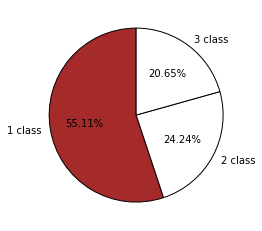

Доля пассажиров 1го класса составила 55.11%


In [7]:
names = ['1 class', '2 class' , '3 class']
plt.pie(data['Pclass'].value_counts(), labels = names, autopct='%1.2f%%', 
        startangle = 90, colors = ['brown', 'white', 'white'], 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.show()
print('Доля пассажиров 1го класса составила 55.11%')

#### 4. Средний возраст пассажира 29.7 лет. Медианный возраст пассажира 28 лет.

In [8]:
mean = data['Age'].mean()
median = data['Age'].median()
print(mean, median)

29.69911764705882 28.0


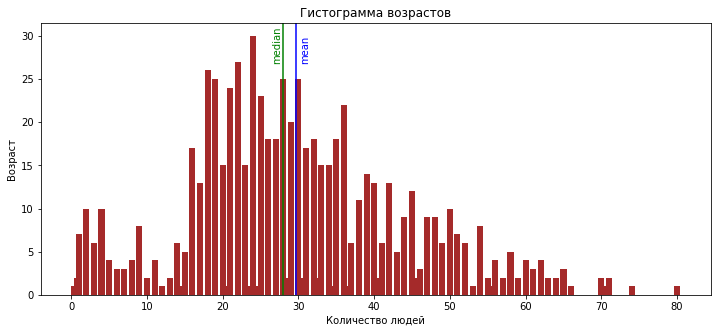

In [9]:
plt.figure(figsize=(12,5))
plt.bar(data['Age'].value_counts().index, data['Age'].value_counts(), color = 'brown')
plt.axvline(mean, color = 'blue', label = 'Mean')
plt.axvline(median, color = 'green', label = 'Median')
plt.text(mean+0.5, 27, 'mean', color = 'blue',  rotation = 'vertical')
plt.text(median-1.5, 27, 'median', color = 'green',  rotation = 'vertical')
plt.title("Гистограмма возрастов")
plt.xlabel('Количество людей')
plt.ylabel('Возраст')
plt.show()

#### 5. Число братьев / сестер коррелирует с числом родителей / детей с коэффициентом 0.415

In [10]:
correlation = data['SibSp'].corr(data['Parch'])
print('Корреляция между числом братьев/сестер и родителей/детей:', correlation)

Корреляция между числом братьев/сестер и родителей/детей: 0.4148376986201551


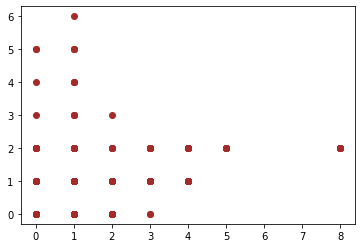

In [11]:
SibSp = data['SibSp']
Parch = data['Parch']
plt.scatter(SibSp, Parch, color = 'brown')
plt.show()

In [12]:
data['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

#### 6. Самое популярное женское имя - Anna

In [13]:
names = data['Name']
woman_names = []

for full_name in names:
    full_name = full_name.split(', ')
    full_name = full_name[1].split('. ', 2)
    sp = full_name[0]
    name = full_name[1]
    if (sp == 'Mrs'):
        char = list(name)
        if ('(' in char):
            name = name.split('(')[1]
            name = name.split()[0]
        elif ('(' not in char):
            name = name.split()[0]
    elif (sp == 'Miss'):
        name = name.split()[0]
    else: name = 'male'
    if (name != 'male'): woman_names = np.append(woman_names, name)

names = pd.Series(woman_names)
top_10_names = names.value_counts().sort_values(ascending = False)[:10]
print('Самое популярное женское имя:', top_10_names.index[0])

Самое популярное женское имя: Anna


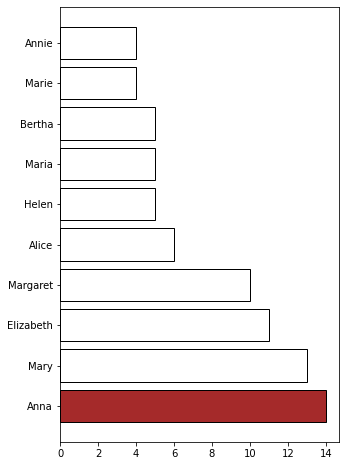

In [14]:
color = ['white' for i in range(0,9)]
color.insert(0, 'brown') 

plt.figure(figsize = (5,8))
plt.barh(top_10_names.index, top_10_names, color = color,
         edgecolor = 'black')
plt.show()